In [55]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import itertools
import seaborn as sns; sns.set()

df = pd.read_stata('kff_october_2020.dta')
df.head()

,id,D1,rvote,Q1A,Q1B,Q1C,Q1D,Q1E,Q1F,Q1G,...,division,changese,iphoneus,hphoneus,SAMPLE_T,CHRONI_1,LVOTE2,STATE1,state,usr
0,00000006,Male,Yes,Very important,Very important,Somewhat important,Somewhat important,Very important,Somewhat important,Somewhat important,...,New England,sex = rsex,Dual,Dual HH,LL KFF PS,"No, no chronic condition",Certain to vote/Already voted,NEW HAMPSHIRE,1,Suburban
1,00000008,Male,Yes,Very important,Very important,Very important,Not too important,Very important,Somewhat important,Very important,...,Pacific,sex = rsex,Dual,Dual HH,LL KFF PS,Yes self or household member has chronic condi...,Certain to vote/Already voted,washington,1,Urban
2,00000016,Male,Yes,Very important,Very important,Somewhat important,Somewhat important,Very important,Very important,Very important,...,East North Central,sex = rsex,Dual,Dual HH,CELL KFF PS,"No, no chronic condition",Certain to vote/Already voted,illinois,1,Urban
3,00000019,Male,Yes,Very important,Very important,Very important,Very important,Somewhat important,Very important,Very important,...,West South Central,sex = rsex,Dual,Dual HH,LL KFF PS,Yes self or household member has chronic condi...,Certain to vote/Already voted,louisiana,1,Suburban
4,00000021,Male,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,West South Central,sex = rsex,cpo,CPO HH,CELL KFF PS,"No, no chronic condition",NaN,texas,1,Urban


In [56]:
df['aca_approve'] = pd.get_dummies(df['aca'])[['Very favorable','Somewhat favorable']].sum(axis=1)

res = smf.logit('aca_approve ~ educ + income',df).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.666656
         Iterations 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            aca_approve   No. Observations:                 1207
Model:                          Logit   Df Residuals:                     1188
Method:                           MLE   Df Model:                           18
Date:                Tue, 15 Dec 2020   Pseudo R-squ.:                 0.03443
Time:                        16:17:48   Log-Likelihood:                -804.65
converged:                       True   LL-Null:                       -833.34
Covariance Type:            nonrobust   LLR p-value:                 5.385e-06
===================================================================================================================================================================================================
                                                                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                           1.4395      0.513      2.808      0.005       0.435       2.444
educ[T.High school incomplete (Grades 9-11 or Grade 12 with no diploma)]                                                           -1.3932      0.613     -2.273      0.023      -2.594      -0.192
educ[T.High school graduate (Grade 12 with diploma or GED certificate)]                                                            -1.3489      0.524     -2.572      0.010      -2.377      -0.321
educ[T.Some college, no degree (includes some community college)]                                                                  -1.2477      0.530     -2.355      0.019      -2.286      -0.209
educ[T.Two year associate degree from a college or university]                                                                     -1.1562      0.541     -2.138      0.033      -2.216      -0.096
educ[T.Four year college or university degree/Bachelor's degree (e.g., BS, BA, AB)]                                                -0.8248      0.529     -1.559      0.119      -1.862       0.212
educ[T.Some postgraduate or professional school, no postgraduate degree]                                                           -0.7977      0.616     -1.296      0.195      -2.004       0.409
educ[T.Post-graduate or professional degree, including master's, doctorate, medical, or law degree (e.g., MA, MS, PhD, MD, JD)]    -0.5102      0.536     -0.952      0.341      -1.561       0.541
educ[T.Don't Know]                                                                                                                -44.5597   1.31e+09  -3.41e-08      1.000   -2.56e+09    2.56e+09
educ[T.Refused]                                                                                                                    -0.9199      0.779     -1.182      0.237      -2.446       0.606
income[T.$20,000 to less than $30,000]                                                                                              0.2079      0.287      0.724      0.469      -0.355       0.771
income[T.$30,000 to less than $40,000]                                                                                             -0.3507      0.287     -1.224      0.221      -0.912       0.211
income[T.$40,000 to less than $50,000]                                                                                             -0.2507      0.280     -0.896      0.370      -0.799       0.298
income[T.$50,000 to less than $75,000]                                                                   

In [62]:
def expandgrid(*itrs):
   product = list(itertools.product(*itrs))
   return {'Var{}'.format(i+1):[x[i] for x in product] for i in range(len(itrs))}


output = pd.DataFrame(expandgrid(df['educ'].cat.categories,df['income'].cat.categories)).rename(columns={'Var1':'educ','Var2':'income'}).dropna()
output['prediction'] = res.predict(output)

output = output.pivot('educ','income','prediction')
output.head()

income,"$100,000 or more","$20,000 to less than $30,000","$30,000 to less than $40,000","$40,000 to less than $50,000","$50,000 to less than $75,000","$75,000 to less than $90,000","$90,000 to less than $100,000",Don't Know,"Less than $20,000",Refused
educ,,,,,,,,,,
Don't Know,1.191384e-19,2.309007e-19,1.320772e-19,1.459581e-19,1.680659e-19,1.209739e-19,1.353406e-19,1.491616e-19,1.875526e-19,5.264568e-20
"Four year college or university degree/Bachelor's degree (e.g., BS, BA, AB)",5.401301e-01,6.947813e-01,5.656113e-01,5.899843e-01,6.236187e-01,5.439253e-01,5.715984e-01,5.952257e-01,6.489986e-01,3.416758e-01
High school graduate (Grade 12 with diploma or GED certificate),4.101800e-01,5.740710e-01,4.353340e-01,4.600385e-01,4.952123e-01,4.138838e-01,4.413433e-01,4.654360e-01,5.226226e-01,2.350660e-01
High school incomplete (Grades 9-11 or Grade 12 with no diploma),3.995114e-01,5.632101e-01,4.244820e-01,4.490605e-01,4.841475e-01,4.031847e-01,4.304556e-01,4.544375e-01,5.115660e-01,2.271976e-01
Less than high school (Grades 1-8 or no formal schooling),7.282386e-01,8.385402e-01,7.481566e-01,7.665153e-01,7.908033e-01,7.312538e-01,7.527277e-01,7.703783e-01,8.083738e-01,5.421504e-01


<AxesSubplot:xlabel='income', ylabel='educ'>

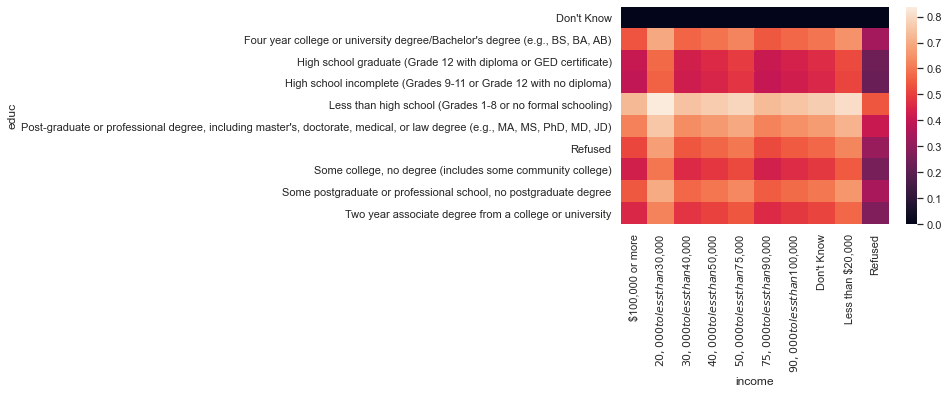

In [63]:
sns.heatmap(output)

In [61]:
df['educ'].cat.categories

Index(['Less than high school (Grades 1-8 or no formal schooling)',
       'High school incomplete (Grades 9-11 or Grade 12 with no diploma)',
       'High school graduate (Grade 12 with diploma or GED certificate)',
       'Some college, no degree (includes some community college)',
       'Two year associate degree from a college or university',
       'Four year college or university degree/Bachelor's degree (e.g., BS, BA, AB)',
       'Some postgraduate or professional school, no postgraduate degree',
       'Post-graduate or professional degree, including master's, doctorate, medical, or law degree (e.g., MA, MS, PhD, MD, JD)',
       'Don't Know', 'Refused'],
      dtype='object')